In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset 
df=pd.read_csv("C:/Users/Admin/Documents/Insurance/expected premium.csv")

In [3]:
df.head()

,Insured Name,Policy Year,Total Reported,Trend Factor,Paid LDF,Reported LDF,Trended and developed
0,KEEP TRUCKING LLC,2021,76499.82,1.06,8.178,2.3514,207542.0
1,KEEP TRUCKING LLC,2020,60990.44,1.12,3.291,1.6167,168185.0
2,KEEP TRUCKING LLC,2019,140698.69,1.19,1.869,1.2316,259850.0
3,KEEP TRUCKING LLC,2018,0.00,1.26,1.349,1.0867,0.0
4,KEEP TRUCKING LLC,2017,0.00,1.34,1.147,1.0313,0.0


In [4]:
#checking if there are any null values in the dataset 
df.isna().sum()

Insured Name             0
Policy Year              0
Total Reported           0
Trend Factor             0
Paid LDF                 1
Reported LDF             1
Trended and developed    1
dtype: int64

In [5]:
#dropping all the null values 
df = df.dropna()

In [6]:
# Check the corr values of final list of variables
cor = df.corr()
cor

,Policy Year,Total Reported,Trend Factor,Paid LDF,Reported LDF,Trended and developed
Policy Year,1.000000,-0.078439,-0.998551,0.830502,0.884114,0.011999
Total Reported,-0.078439,1.000000,0.076229,-0.089741,-0.092911,0.928530
Trend Factor,-0.998551,0.076229,1.000000,-0.803218,-0.860422,-0.011925
Paid LDF,0.830502,-0.089741,-0.803218,1.000000,0.990610,-0.001069
Reported LDF,0.884114,-0.092911,-0.860422,0.990610,1.000000,-0.000010
Trended and developed,0.011999,0.928530,-0.011925,-0.001069,-0.000010,1.000000


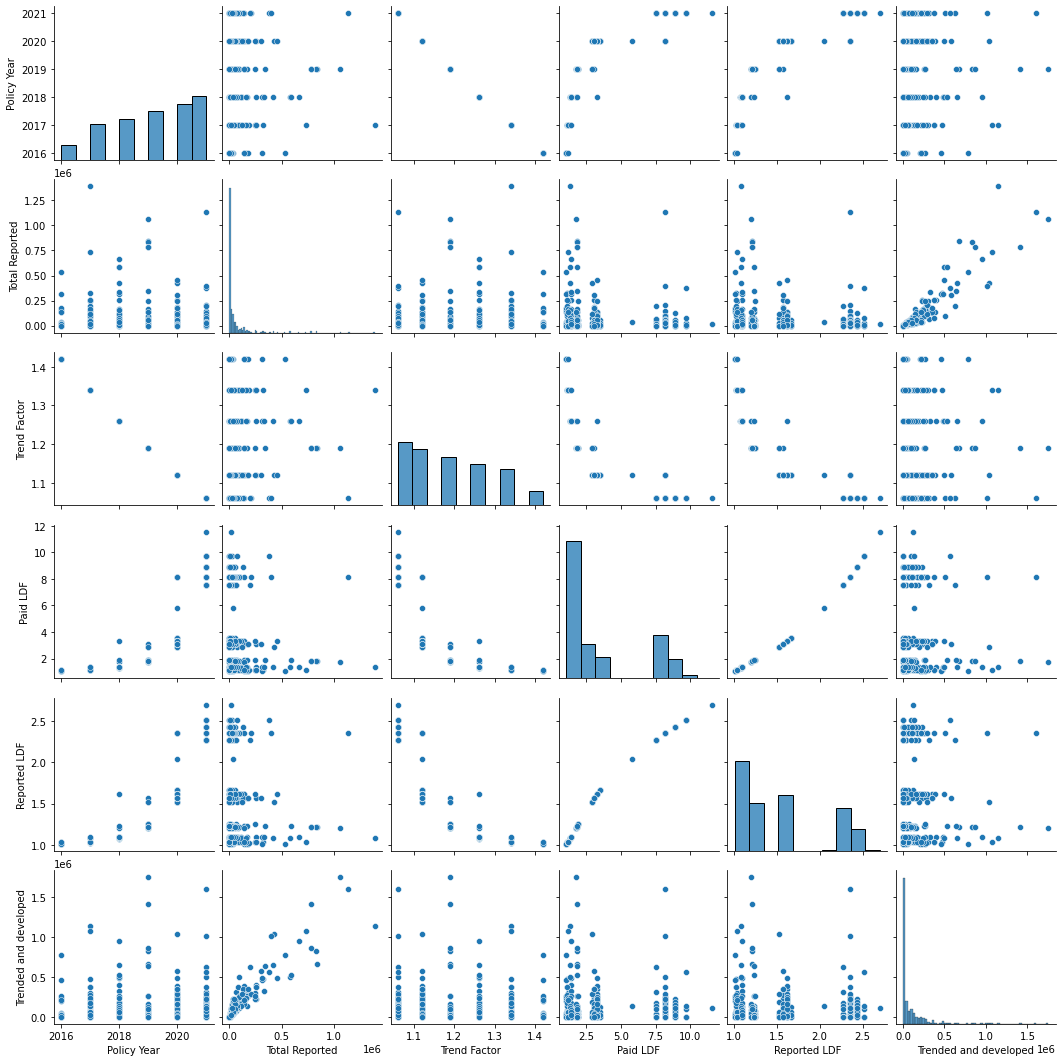

In [7]:
#checking linearity between variables 
sns.pairplot(df)

In [8]:
#droping columns with high collinearity 
df=df.drop(["Reported LDF"],1)

In [9]:
# dropping policy year and insured name 
df=df.drop(["Policy Year"],1)
df=df.drop(["Insured Name"],1)

In [10]:
df

,Total Reported,Trend Factor,Paid LDF,Trended and developed
0,76499.82,1.06,8.178,207542.0
1,60990.44,1.12,3.291,168185.0
2,140698.69,1.19,1.869,259850.0
3,0.00,1.26,1.349,0.0
4,0.00,1.34,1.147,0.0
...,...,...,...,...
426,0.00,1.12,3.087,0.0
427,779959.27,1.19,1.810,864976.0
428,585521.55,1.26,1.869,528136.0
429,16264.22,1.34,1.373,26844.0


In [11]:
## train test split 
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
## standardizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Total Reported', 'Trend Factor', 'Paid LDF', 'Trended and developed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [14]:
df_train.head()

,Total Reported,Trend Factor,Paid LDF,Trended and developed
253,0.013262,0.555556,0.028130,0.016208
273,0.119802,0.555556,0.030419,0.148262
117,0.000000,0.000000,0.749404,0.000000
202,0.020817,0.000000,0.679317,0.047790
15,0.001114,0.000000,0.749404,0.005325


In [15]:
#Dividing data into X and y variables
y_train = df_train.pop('Trended and developed')
X_train = df_train

In [16]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [17]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm

In [18]:
#Create the first model and trying to clean up features with Colinearity
model = build_model(X_train, y_train)

                              OLS Regression Results                             
Dep. Variable:     Trended and developed   R-squared:                       0.865
Model:                               OLS   Adj. R-squared:                  0.863
Method:                    Least Squares   F-statistic:                     632.0
Date:                   Fri, 16 Sep 2022   Prob (F-statistic):          1.47e-128
Time:                           16:48:11   Log-Likelihood:                 554.00
No. Observations:                    301   AIC:                            -1100.
Df Residuals:                        297   BIC:                            -1085.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

The R-squared is 0.86 but most of the features are above the significance level of 0.05